<a href="https://colab.research.google.com/github/sueta1995/CourseWork_TRPS/blob/machine_learning/classification/odonata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import scipy
import pickle
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras import layers, Input

In [20]:
IMG_SIZE = 224
CHANNELS = 3
TRAIN_DIR = '/mnt/d/odonata_data_73/train_data'
VALID_DIR = '/mnt/d/odonata_data_73/valid_data'
DS_PATH = '/mnt/d/odonata_data/'
EPOCHS = 10
BATCH_SIZE = 128
NUM_CLASSES = 44

In [21]:
# Для google colab
# from google.colab import drive
# drive.mount('/content/drive')

# VALID_DIR = '/content/drive/MyDrive/odonata_data/valid_data'
# TRAIN_DIR = '/content/drive/MyDrive/odonata_data/train_data'

In [22]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8,1.2],
    horizontal_flip=True
)

def train_generator():
    return datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical'
    )

def valid_generator():
    return datagen.flow_from_directory(
        VALID_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical'
    )

Found 30800 images belonging to 44 classes.


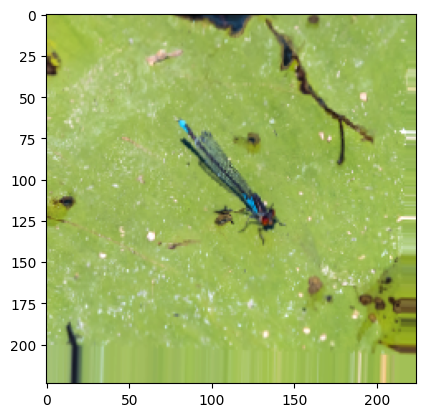

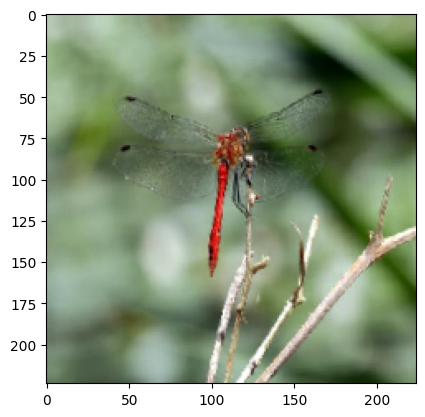

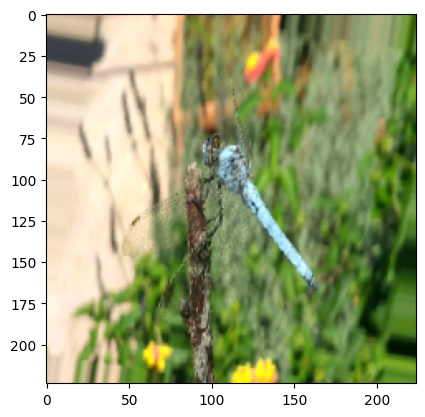

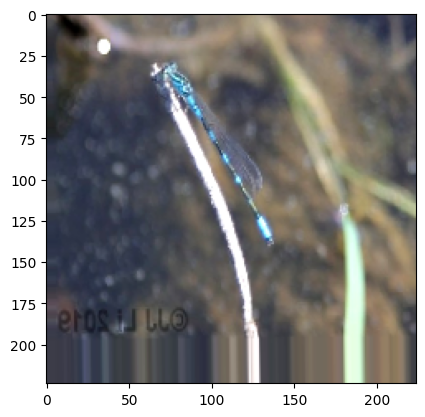

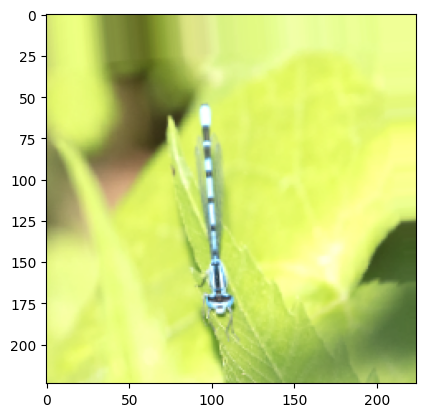

In [23]:
train = train_generator()

for _ in range(5):
    img, label = train.next()
    plt.imshow(img[0])
    plt.show()

In [25]:
model = Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=(11, 11),
                        strides=(4, 4), activation="relu",
                        input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(44, activation="softmax"))

model.summary()

model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                      

In [26]:
callbacks = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=3, verbose=1)
all_epochs = 0
history = []

In [27]:
for _ in range(EPOCHS):
    print(f"Десятка эпох: {_ + 1}")
    
    history.append(model.fit(
        train_generator(),
        validation_data=valid_generator(),
        epochs=10,
        callbacks=callbacks
    ))

    all_epochs += 10

Десятка эпох: 1
Found 30800 images belonging to 44 classes.
Found 13200 images belonging to 44 classes.
Epoch 1/10


2023-08-03 17:10:29.439526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 17:10:29.515479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 17:10:29.515519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


241/241 [==============================] - ETA: 0s - loss: 5.8705 - accuracy: 0.0356

2023-08-03 17:23:40.024213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 17:23:40.056620: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 17:23:40.056656: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


241/241 [==============================] - 1110s 5s/step - loss: 5.8705 - accuracy: 0.0356 - val_loss: 3.7928 - val_accuracy: 0.0324
Epoch 2/10
241/241 [==============================] - 478s 2s/step - loss: 3.7039 - accuracy: 0.0468 - val_loss: 4.7011 - val_accuracy: 0.0257
Epoch 3/10
241/241 [==============================] - 477s 2s/step - loss: 3.6885 - accuracy: 0.0490 - val_loss: 3.6743 - val_accuracy: 0.0476
Epoch 4/10
241/241 [==============================] - 484s 2s/step - loss: 3.6242 - accuracy: 0.0601 - val_loss: 3.7881 - val_accuracy: 0.0370
Epoch 5/10
241/241 [==============================] - 489s 2s/step - loss: 3.5304 - accuracy: 0.0712 - val_loss: 3.7820 - val_accuracy: 0.0403
Epoch 6/10
241/241 [==============================] - 483s 2s/step - loss: 3.4484 - accuracy: 0.0832 - val_loss: 3.5670 - val_accuracy: 0.0671
Epoch 7/10
241/241 [==============================] - 481s 2s/step - loss: 3.3474 - accuracy: 0.1025 - val_loss: 3.4028 - val_accuracy: 0.0921
Epoch 8/1

KeyboardInterrupt: 

In [29]:
print(f"Всего эпох: {all_epochs}")

Всего эпох: 40


In [30]:
model.save('/mnt/d/odonata_model_updated.h5')

IndexError: list index out of range

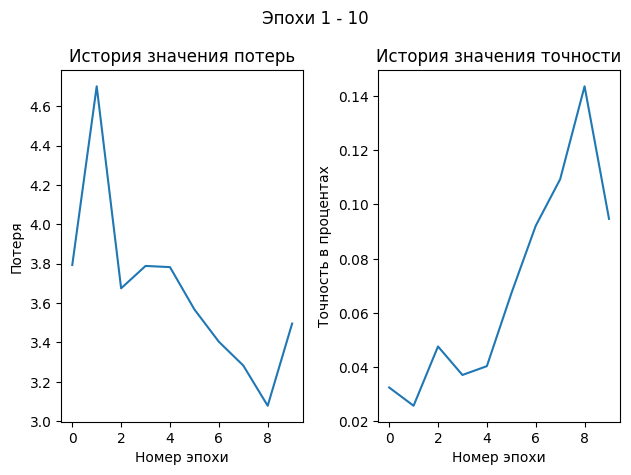

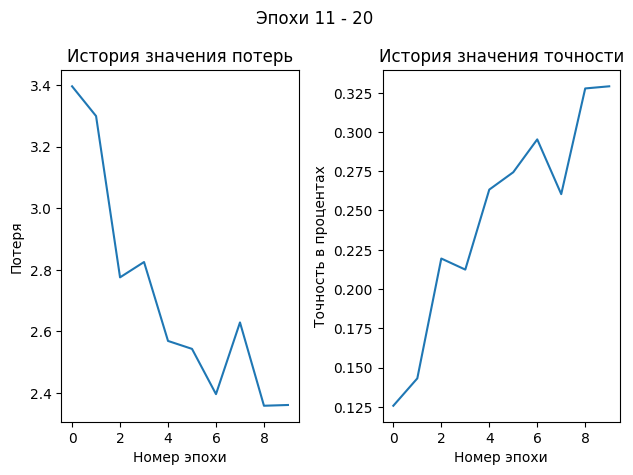

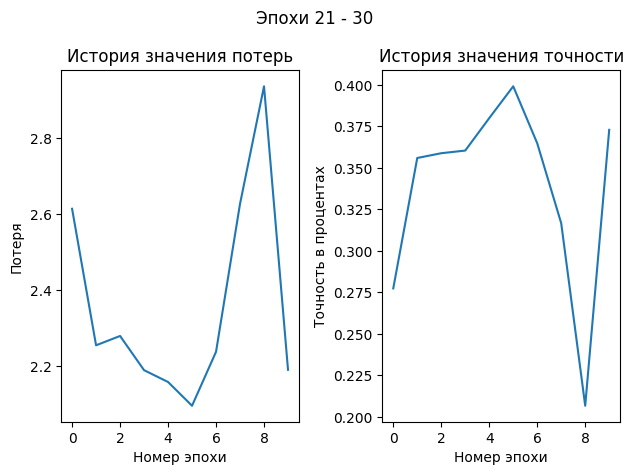

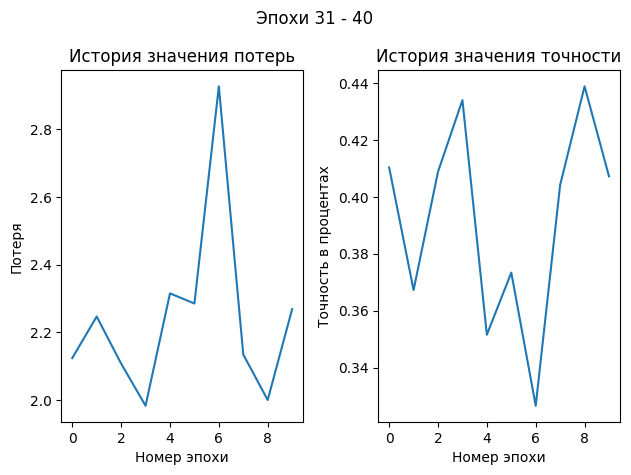

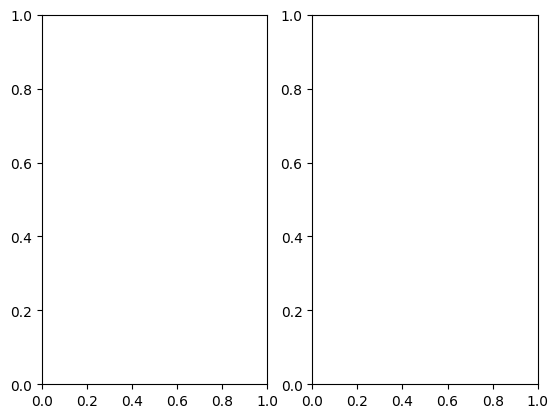

In [34]:
for _ in range(EPOCHS):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    # Plot history: Loss
    axes[0].plot(history[_].history['val_loss'])
    axes[0].set_title('История значения потерь')
    axes[0].set_ylabel('Потеря')
    axes[0].set_xlabel('Номер эпохи')
    
    # Plot history: accuracy
    axes[1].plot(history[_].history['val_accuracy'])
    axes[1].set_title('История значения точности')
    axes[1].set_ylabel('Точность в процентах')
    axes[1].set_xlabel('Номер эпохи')
    
    fig.suptitle(f'Эпохи {_ * 10 + 1} - {_ * 10 + 10}')
    plt.tight_layout()
    fig.savefig(f'/mnt/d/model_history_updated/{_}.png', bbox_inches='tight')